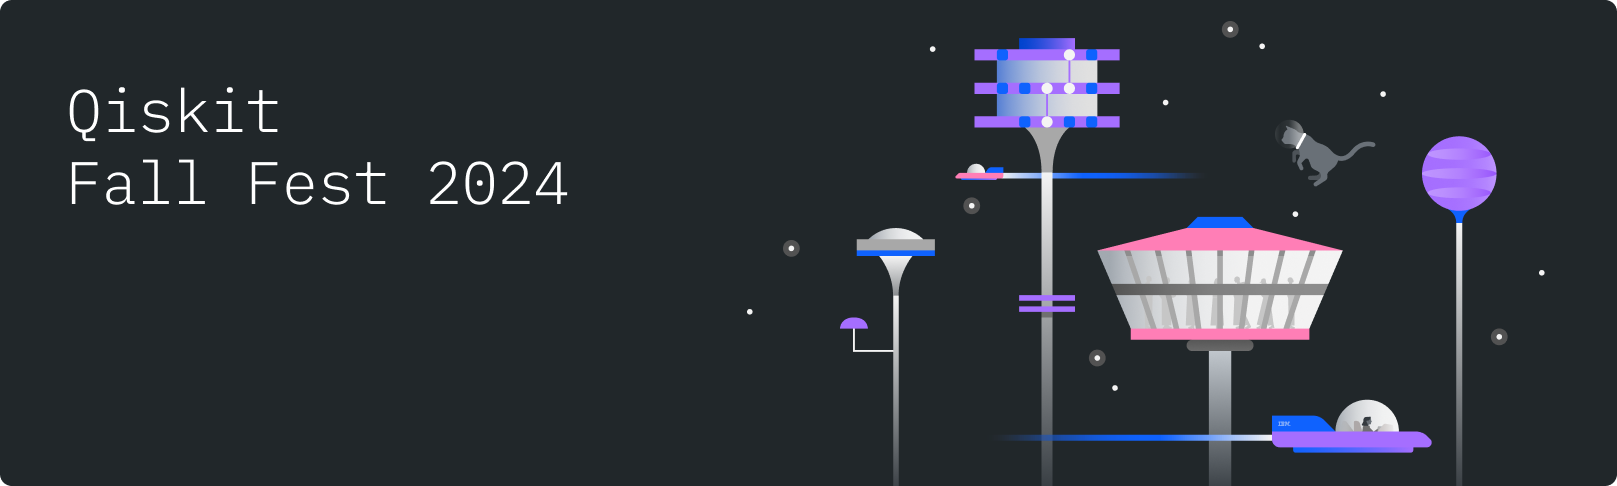

# Open Notebook A: First Steps into Quantum Computing

- Beginner Coding Prompts

- Difficulty: 1/5

Hi there and welcome to the **Qiskit Fall Fest**!!

Whether you're a total beginner or a PhD candidate in quantum physics, there is something here for you. Thanks for joining us.  😀

As part of the Qiskit Fall Fest, IBM Quantum has created a series of notebooks for you to work through, which include coding challenges and Qiskit tutorials.

The Qiskit Fall Fest is a massive event, featuring thousands of students worldwide who are all learning about quantum computing and Qiskit. Just by being here, you're helping to make history. Your participation is helping to shape what the future of the industry will look like. Congratulations and welcome!

### Open Notebooks

This is an Open Notebook, which means it has tutorials and code examples but does not use an auto-grader. There are no requirements you need to meet in order to "finish" this notebook. You can use this as a personal learning tool, a group project, or a workshop resource. Each Open Notebook is meant to help you better understand Qiskit and quantum computing in general.

**Open Notebook A** will cover the very first steps of writing a quantum circuit.

---

In each notebook, you will find links to documentation, tutorials, and other helpful resources you might need to solve that particular problem. You can also find most of these resources on IBM's new home for quantum education: [IBM Quantum Learning](https://learning.quantum.ibm.com/).

If you have never used Python before, you will **definitely** struggle with these notebooks. We recommend you [go learn the basics of Python before continuing](https://www.learnpython.org/).

### Setup

It should be obvious, but you need to have Qiskit installed to correctly finish each notebook within the Qiskit Fall Fest. Most participants of the Qiskit Fall Fest are likely running this notebook in a cloud-based tool [like Google Colab](https://colab.research.google.com/) or [qBraid](https://www.qbraid.com/), so our instructions are built towards that.

Below is some code to install Qiskit within your current environment.

In [ ]:
### INSTALL QISKIT inside your cloud-based environment

%pip install qiskit[visualization]
%pip install qiskit_aer
%pip install qiskit_ibm_runtime

In [ ]:
### Import the required packages

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

## Part 1: What is Qiskit?

The Qiskit Fall Fest is an amazing event currently happening on your campus with your classmates and friends. However, this is just one small part of the entire Qiskit ecosystem.

The **[Qiskit SDK](https://www.ibm.com/quantum/qiskit)** is the world's most popular software stack for quantum computing, with over 2,000 forks, over 8,000 contributions, and over 3 trillion circuits run.

Qiskit first emerged in 2017 as an open-source software development kit (SDK), but since then, it has evolved into a comprehensive software stack delivering the world’s most performant software for building, optimizing, orchestrating, and executing quantum workloads. Today, the Qiskit SDK is just one component in this expanded software stack, but it remains vitally important. Its architecture, capabilities, and emphasis on the circuit model of quantum computation have all heavily informed the development of the rest of the Qiskit software stack.

Qiskit allows anyone to easily design experiments and applications and run them on real quantum computers. Qiskit is actively used around the world by beginners, hobbyists, educators, researchers, and commercial companies.

### Quantum circuits

The fundamental unit of Qiskit is the **quantum circuit**, which is a series of instructions that a quantum computer can use to work with quantum bits of information, also known as **qubits**. These qubits have special properties that enable quantum computers to approach problems differently than how your laptop or iPhone might. Qiskit is rapidly advancing as a technology -- while you can still manually design your quantum circuits and decide how you want it to run (and there are plenty of good reasons to do so), IBM Quantum also provides you with tools that simplify the process. For the sake of learning, we are going to design a very simple circuit and run it on a simulator.

We're breezing through this overview because, honestly, we could spend hours just explaining the basics of quantum information and computation. In fact, IBM Quantum has done this already, producing a [written course](https://learn.qiskit.org/course/basics/single-systems) and a series of [video lectures](https://www.youtube.com/playlist?list=PLOFEBzvs-VvqKKMXX4vbi4EB1uaErFMSO) devoted to the topic. If you need a refresher, check them out!

### Your first quantum circuit

Below we have created a quantum circuit with 2 qubits and 2 classical bits using the `QuantumCircuit()` function. We also included the method `qc.draw()` which will create a drawing of the circuit for us to see.

Notice the horizontal lines next to `q0` and `q1` -- those are visual timelines that you can use to understand the order in which instructions are sent to each qubit. Every horizontal line represents a different qubit on the quantum computer.

You don't need to write any new code in this cell, just run it and see the results. If you're getting an error, make sure Qiskit is installed properly.

In [ ]:
# Create quantum circuit with 2 qubits
qc = QuantumCircuit(2,2)

# return a drawing of the circuit
qc.draw('mpl')

We have not actually sent any instructions to our qubits yet. Instructions come in the form of **gates** which are placed on the circuit, corresponding to a particular qubit. If you're unfamiliar with gates, you should check out the [IBM Quantum Composer](https://quantum.ibm.com/composer) and it's associated documentation. IBM provides a drag-and-drop interface to experiment with different gates and observe their impacts on your quantum circuit. We will not be covering the function of each gate in this notebook.

For now we're going to add a Not gate (or an X gate) to qubit 0. We can do this by appending `.x()` after the name of our QuantumCircuit variable, and passing the desired qubit's number in the parenthesis.

In the previous code cell, we saved the QuantumCircuit variable as `qc`. Jupyter Notebooks remember the order in which you ran your cells, so you don't need to rewrite your previous code in each new cell.

**Important Note** - That means you should be careful to run your cells in order. If you go out of order, your variables and circuits might be confused.

In [ ]:
# Add an X gate to qubit 0
qc.x(0)

# return a drawing of the circuit
qc.draw('mpl')

Next, we can use a Hadamard gate `.h()` to put a qubit into superposition. Below we are calling the same `qc` variable which our QuantumCircuit object is saved to, and applying a Hadamard gate to qubit 1.

In [ ]:
qc.h(1)
qc.draw("mpl")

Finally, we need a way to tell our quantum computer to measure our qubits and record the results. To do this, we add a "measure" gate to our quantum circuit. We can do this with the QuantumCircuit's `.measure()` method. We've put two arrays inside the method, telling qubits 0 and 1 to be measured to the classical bits 0 and 1.

In [ ]:
# add measure gates to all the qubits
qc.measure([0,1], [0,1])

qc.draw("mpl")

Hey, just for fun, go back and re-run that cell above. Notice how the output changes. Run it again. We probably don't want all those `measure` gates stacked up, huh?

When we're coding our circuits, it's always a good practice to draw the current circuit to make sure it looks like what we expect. Simple little errors like we just saw can happen easily.

So to make sure everything is perfect, let's make a new circuit below.

### Exercise 1

We have setup a new circuit using two qubits below, named `qc_ex1`

**Your Task:** Add four total gates onto your quantum circuit. Mix them on between both qubits. You can use either a NOT gate `.x()` or a Hadamard gate `.h()`

We have created a new circuit in the below code cell. Now, if you re-run the cell multiple times, the circuit will reset and your gates will *not* stack on top of each other.

In [ ]:
qcEx1 = QuantumCircuit(2,2)

### Add your X or H gates onto a qubit below this line
### Remember our QuantumCircuit is saved to the qcEx1 variable

qcEx1.h(1)


### Leave the code below this line unchanged
qcEx1.measure([0,1], [0,1])

qcEx1.draw("mpl")

Nice work. You should see six total gates; four that you added plus two measurement gates at the end.

When we measure the qubits, we knock them out of any unique quantum state they may be in. This means that when we measure a qubit, we can only get a *classical* bit of data, a zero or a one. That's why we include the classical bits when we create a new `QuantumCircuit()` object.

### Getting results from a circuit

Now let's see what the results of running this circuit would be. First we will use a quantum simulator, which is a standard computer calculating what an ideal quantum computer would do. Later, you will run a circuit on a real quantum computer.

Simulating a large quantum computer is difficult for classical computers, since the best quantum algorithms we have grow exponentially with the number of qubits. As such, using a simulator is only possible for circuits with small numbers of qubits, or certain types of circuits for which we can use some tricks to speed up the simulation. Nevertheless, simulators are useful tools for educational purposes.

Let's import Qiskit’s simulator (called Aer), and make a new simulator object.

In [ ]:
# make a new simulator object
backend = AerSimulator()
sampler = Sampler(backend)

To do the simulation, we can use the simulator’s `.run()` method. This returns a "job", which contains information about the experiment, such as whether the experiment is running or completed, the backend it ran on, and (importantly for us), the results of the experiment.

To get the results from the job, we use the results method, and the most popular way to view the results is as a dictionary of "counts".

In [ ]:
# run the experiment
job = sampler.run([qcEx1])

# get the results
result = job.result()[0]

# interpret the results as a "counts" dictionary
result.data.c.get_counts()

The number on the left is called a **key**, and the number on the right is a called a **value**. The key tells us what each of our two qubits got measured as, and the value is the number of times that specific result was measured.

Depending on the gates you placed, your keys are either 00, 01, 10, or 11.

Your values will be unqiue, but if you add all the values together they should equal 1024.


### Why did we run this circuit 1024 times?

Quantum computers are still very new, and can have randomness in their results. It's common to repeat your circuit a few times (or a few hundred) to compare your results. This circuit was repeated 1024 times, which is the default number of times to repeat a circuit in Qiskit.

## Part 2: Make a Bell state

Quantum computers can use "gates" to send different instructions to the qubits. Let's look at three commonly used gates:

You have already encountered the **Not gate** `.x()`. This is one of the most basic operations that you can do in a computer; it simply flips the bit value. A 0 becomes 1, or a 1 becomes 0. This is commonly referred to as either an X gate or a NOT gate.

You have also met the **Hadamard gate** `.h()`. This gate puts a qubit into a superposition, which hopefully you've already learned in one of your Fall Fest workshops!

The last gate we'll look at for now is the **CNOT gate**. There's a few ways to explain what this gate is. To keep it simple, let's say that this is the entanglement gate. It entangles two qubits together. We apply a CNOT gate by using `.cx()` and passing the two qubit numbers we wish to entangle, separated by a comma.

Time for you to put each of these into action:

In [ ]:
qc = QuantumCircuit(2)

# Apply a Not gate to qubit 0


# Put qubit 0 into superposition


# Entangle together qubit 0 and 1



qc.draw(output="mpl")

Pretty simple! Your final circuit should look like this:

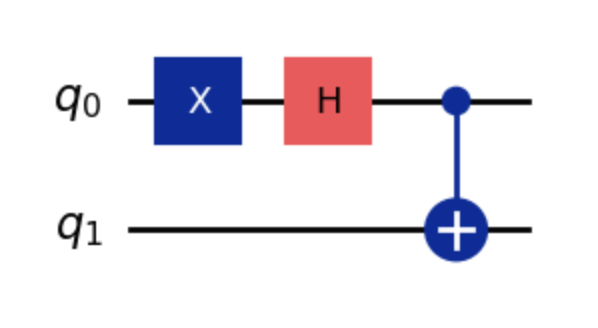

### Exercise 2

Let's use these gates to create a Bell state. These are like the "hello world" of quantum computing -- they are the circuits we use to generate a maximally entangled states.

**YOUR TASK:** In the cell below, we have already created a new Quantum Circuit with two qubits, named `qcEx2`. Apply a Hadamard gate to `q0`, then a CNOT gate connecting qubit 0 to qubit 1.

In [ ]:
qcEx2 = QuantumCircuit(2, 2)

## Write your code below here ##




## Do not modify the code under this line ##
qcEx2.measure([0,1], [0,1])

qcEx2.draw(output="mpl")

If you've done everything correct, you **must** see a quantum circuit like this.

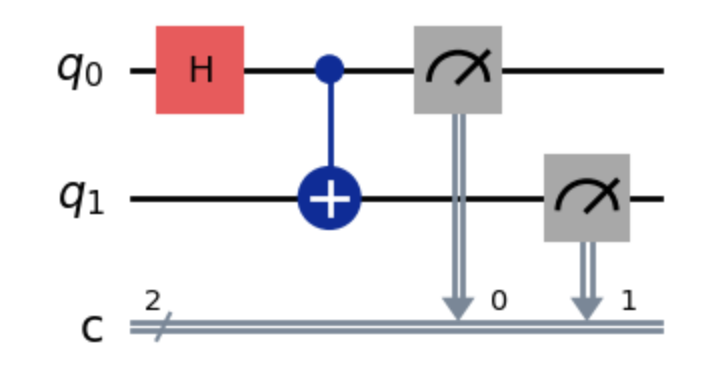

## Run on real hardware

It's time to run your circuit on a real quatum computer. There are just a few last steps to follow before you can.

* You need to **store your API token**. If you do not properly store your API token, you will not be able to access the IBM quantum backends available.
* You need to decide which quantum computer you would like to run your circuit on.
* You need to transpile your circuit down to the basis gates which match that backend you will run on. You can learn more about this process from [IBM's transpilation documentation](https://docs.quantum.ibm.com/guides/transpile).


We have already provided the code for all these steps below, but you'll need to modify one line (your API token) to make sure it all works correctly.

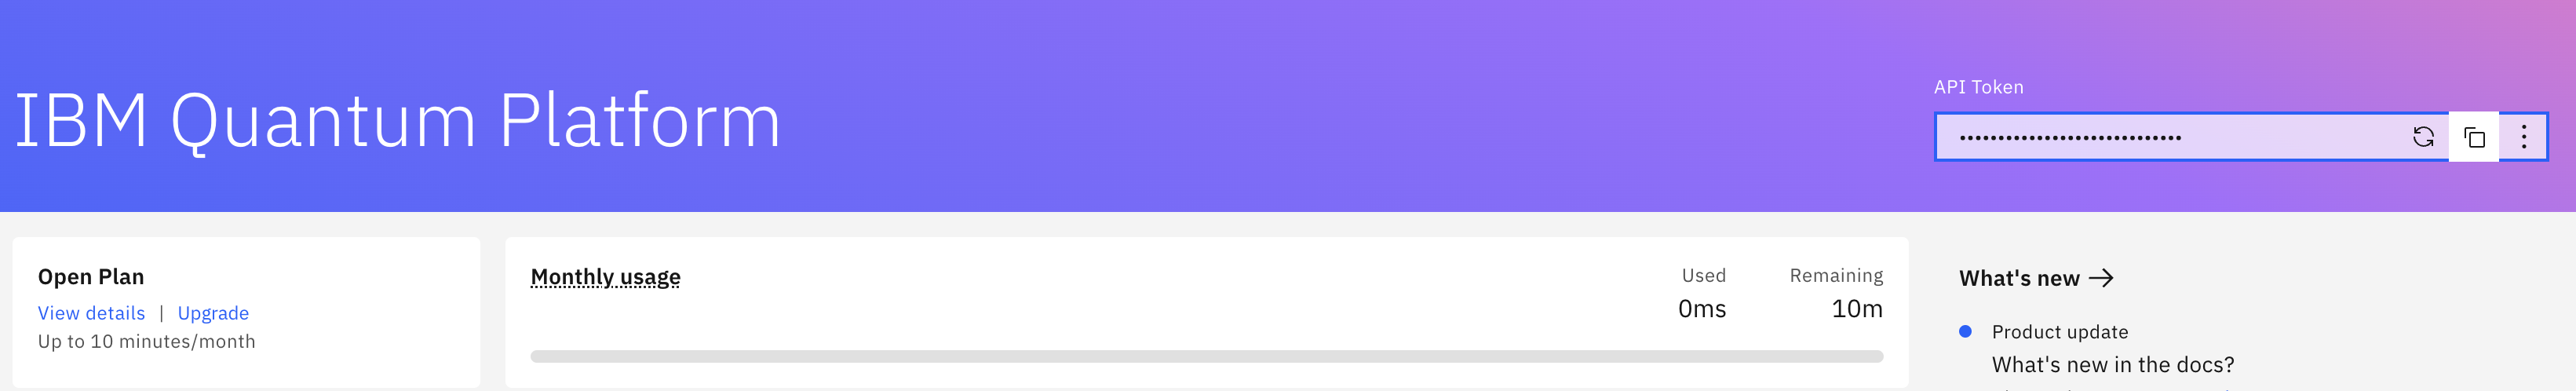

### Save your IBM Quantum account

1.   Navigate to the [IBM Quantum Platform](https://quantum.ibm.com/) and log in
2.   Look to the top right corner, click and copy your API token (pictured above)
3.   In the code cell below, replace `Your_token_here` with your token
4.   Make sure your token is inside the quotation marks!!

In [ ]:
## Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(

    channel="ibm_quantum",

    token="Your_token_here",

    set_as_default=True,

    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

### Prepare your circuit for a certain backend

The code for both of these steps is already provided below, you do not need to modify any lines.

In [ ]:
## To run on hardware, select the backend with the fewest number of jobs in the queue

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
backend.name

In [ ]:
## Convert your circuit down to necessary basis gates for the backend you just selected

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qcEx2_isa_circuit = pm.run(qcEx2)
qcEx2_isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")

You are now ready to run your circuit on a real quantum computer!

The next code cell will send your circuit to the IBM quantum computer with the least amount of people in the queue. Depending on the device and the time of day, this can take a few minutes, or a few hours.

There are a few ways to check the status of your job while you're waiting. One is to simply go to the [IBM Quantum Platform](https://quantum.ibm.com/) and check the dashboard. We've included a picture of what that looks like after the code cell.

In [ ]:
# make a new Sampler object
sampler = Sampler(backend)

# run the experiment
job = sampler.run([qcEx2_isa_circuit])

# get the results
result = job.result()[0]

# interpret the results as a "counts" dictionary
counts_sampler = result.data.c.get_counts()

plot_histogram(counts_sampler)

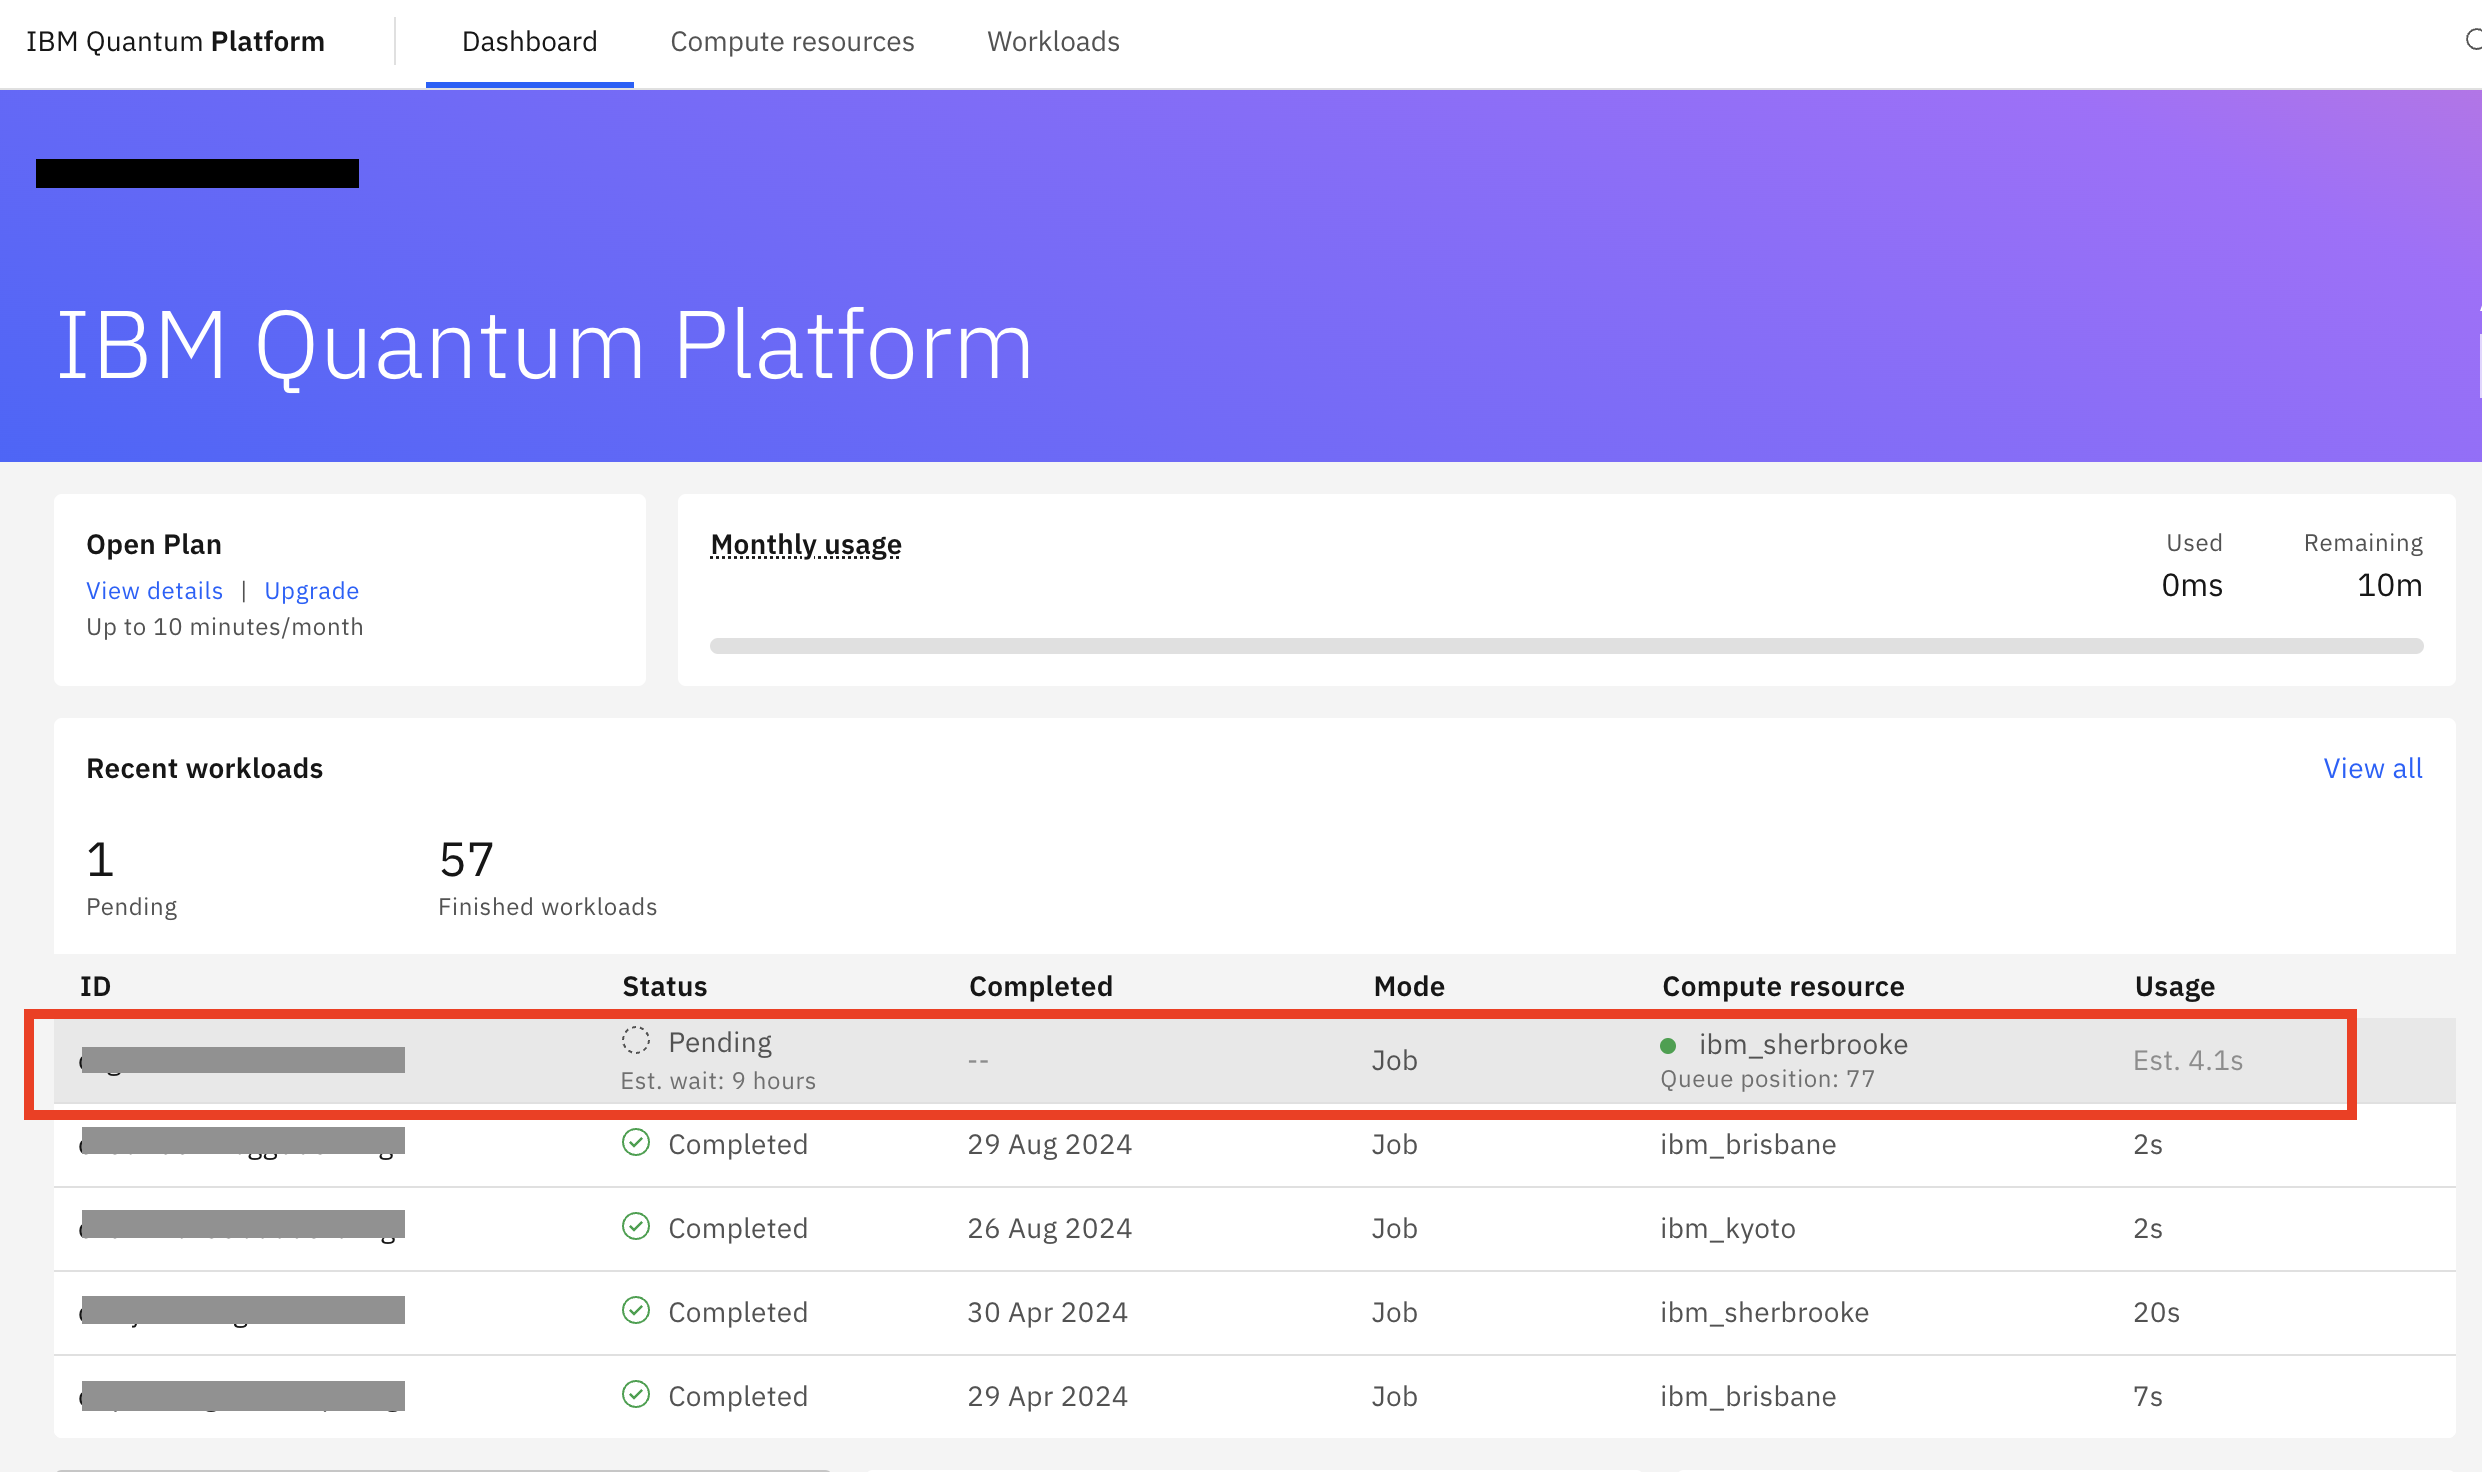

## Congratulations!

You've made it to the end of the first open notebook! Let's recap what you learned:

-  The fundamental unit of Qiskit is the quantum circuit, which is a series of instructions (gates) that a quantum computer can use to work with quantum bits of information, also known as qubits.
- When you measure a qubit, it falls out of it's quantum state down to a single bit of information, a 0 or a 1
- The X gate flips a qubit from 0 to 1 (or vice versa)
- The H gate puts a qubit into superposition
- The CX gate entangles two qubits together
- You can run your circuit on a quantum computer easily using Qiskit Runtime

Now that you know a little bit about Qiskit, it is time to move onto the next Notebook and learn more. Enjoy the Qiskit Fall Fest. Good luck!

## Additional information

**Created by:** Brian Ingmanson

**Advised by:** Sophy Shin

**Version:** 1.0.0